![Start](https://cdn2.civitatis.com/estados-unidos/las-vegas/guia/newyork-newyork.jpg)

<center>

# **P2: DATASET AIRBNB: BOROUGHS OF NOVA YORK CITY**

**Project Author:** Dieggo Henrique

</center>

# **1. AirBnB Summary**



1. Eliminar duplicatas  
2. Eliminar registros em que 'Reviews' = zero ou _missing value_  
3. Eliminar registros em que 'Score' = zero ou _missing value_
4. Eliminar os tipos de imóvel que sejam pouco relevantes para o negócio  
 * Retirar boat 
 * Retirar Bungalow 
 * Retirar Cabin 
 * Retirar Camper/RV 
 * Retirar Castle 
 * Retirar Chalet 
 * Retirar Hut 
 * Retirar Lighthouse 
 * Retirar Other 
 * Retirar Tent 
 * Retirar Treehouse  
 
 
5. Created features:
 * Created columns 'Faturamento', multply between 'Number of Reviews' and 'Price'
 * Created columns with values 'Periodo', this columns is the multiply between time (more recentrly time of the dataset with times if the columns'Host Since'.
 * Created columns 'Freq', this columns is relation between features 'Periodo' and 'Reviews'.
 * Drop the year of the 2019, in this year the data is not be complet.
 * Created columns 'Freq Bin', with the features 'Freq'


|       If        | Frequencty     | Score             | Else       |
|-----------------|----------------|-------------------|------------|
| `if`            | `Low`          | *Low*             | Number 1   |
| `if`            | `Low`          | *Middle*          | Number 2   |
| `if`            | `Low`          | *Hight*           | Number 3   | 
| `if`            | `Middle`       | *Low*             | Number 4   |
| `if`            | `Middle`       | *Middle*          | Number 5   |
| `if`            | `Middle`       | *Hight*           | Number 6   |
| `if`            | `Hight`        | *Low*             | Number 7   |
| `if`            | `Hight`        | *Middle*          | Number 8   |
| `if`            | `Hight`        | *Hight*           | Number 9   |


6. Realizar a Análise Exploratória de Dados para obtenção de insights.

* Qual bairro é mais procurado?
* O que compensa mais para o locador, alugar um comodo ou a propriedade?
* Realizar outras análises que acharem necessários.



## **1.1 Importação das bibliotecas e Leitura do Dataset**

In [67]:
# Importing library
# Libraries for matrix and ETL
import pandas as pd
import numpy as np

# Libraries for Grafics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

# Libraries packeges
from scipy import stats
import statsmodels.api as sm

In [68]:
from google.colab import drive
# importando dataset da web
airbnb = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/P2_airbnb_dados.xlsx')

# Vizualizando o Dataset
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Number of Reviews,Price,Scores Rating
0,500,2012-01-17,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,10024.0,0,199,NaN
1,500,2012-01-17,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036.0,39,549,96.0
2,1039,2012-02-15,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,Entire home/apt,11222.0,4,149,100.0
3,1783,2012-03-04,Amazing Also,Manhattan,Apartment,Entire home/apt,10004.0,9,250,100.0
4,2078,2012-03-07,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,Private room,11201.0,80,90,94.0


# **2 Extract Transform Load (ETL)**

In [69]:
# checking type of every column in the dataset
airbnb.dtypes

Host Id                       int64
Host Since           datetime64[ns]
Name                         object
Neighbourhood                object
Property Type                object
Room Type                    object
Zipcode                     float64
Number of Reviews             int64
Price                         int64
Scores Rating               float64
dtype: object

In [70]:
# Cheking missing values in the dataset
airbnb.isnull().sum()

Host Id                 0
Host Since              0
Name                    0
Neighbourhood           0
Property Type           3
Room Type               0
Zipcode               131
Number of Reviews       0
Price                   0
Scores Rating        8018
dtype: int64

In [71]:
# Removing missing values of the spicific columns
airbnb = airbnb.dropna(subset = ['Number of Reviews',
                                 'Price',
                                 'Scores Rating', 
                                 'Property Type'
                                ])

airbnb.isnull().sum()
# Zipcode is not importat features for this moments

Host Id               0
Host Since            0
Name                  0
Neighbourhood         0
Property Type         0
Room Type             0
Zipcode              99
Number of Reviews     0
Price                 0
Scores Rating         0
dtype: int64

In [72]:
# Removing 'Property Types' what is not important for analyses
airbnb = airbnb[airbnb['Number of Reviews'] != 0]
airbnb = airbnb[airbnb['Property Type'] != 'Boat']
airbnb = airbnb[airbnb['Property Type'] != 'Camper/RV']
airbnb = airbnb[airbnb['Property Type'] != 'Other']
airbnb = airbnb[airbnb['Property Type'] != 'Castle']
airbnb = airbnb[airbnb['Property Type'] != 'Other']
airbnb = airbnb[airbnb['Property Type'] != 'Other']
airbnb = airbnb[airbnb['Property Type'] != 'Dorm']
airbnb = airbnb[airbnb['Property Type'] != 'Bungalow']
airbnb = airbnb[airbnb['Property Type'] != 'Cabin']
airbnb = airbnb[airbnb['Property Type'] != 'Chalet']
airbnb = airbnb[airbnb['Property Type'] != 'Villa']
airbnb = airbnb[airbnb['Property Type'] != 'Hut']
airbnb = airbnb[airbnb['Property Type'] != 'Lighthouse']

# Removing Columns of the DataSet
airbnb = airbnb.drop(columns=['Zipcode', 
                              'Name', 
                              'Host Id'])

# Vizualize the Dataset
airbnb.isnull().sum()

Host Since           0
Neighbourhood        0
Property Type        0
Room Type            0
Number of Reviews    0
Price                0
Scores Rating        0
dtype: int64

In [73]:
# Calculating average of 'Number of Reviwes', 'Price' and 'Score Rating'.
round( airbnb.groupby('Property Type').mean(), 2 )

,Number of Reviews,Price,Scores Rating
Property Type,,,
Apartment,16.17,154.10,92.07
Bed & Breakfast,26.53,104.06,90.56
Condominium,9.48,220.50,92.71
House,20.38,138.44,91.01
Loft,19.91,202.33,93.73
Townhouse,7.06,191.96,93.81


## **2.1 Created columns 'Revenues', multiply between 'Number of Reviews' and 'Price'.**

In [74]:
# Created features 'Revenues', like the Dataset is not give us a Values of the 
# revenue, we created for better analisys.
# Revenues = ['Number of Reviews'] * ['Price']
airbnb['Revenue'] = airbnb['Number of Reviews'] * airbnb['Price']
airbnb.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue
1,2012-01-17,Manhattan,Apartment,Private room,39,549,96.0,21411
2,2012-02-15,Brooklyn,Apartment,Entire home/apt,4,149,100.0,596
3,2012-03-04,Manhattan,Apartment,Entire home/apt,9,250,100.0,2250
4,2012-03-07,Brooklyn,Apartment,Private room,80,90,94.0,7200
5,2012-03-12,Manhattan,Apartment,Entire home/apt,95,270,90.0,25650


Text(0.5, 1.0, 'INCOME BY YEAR IN AIRBNB')

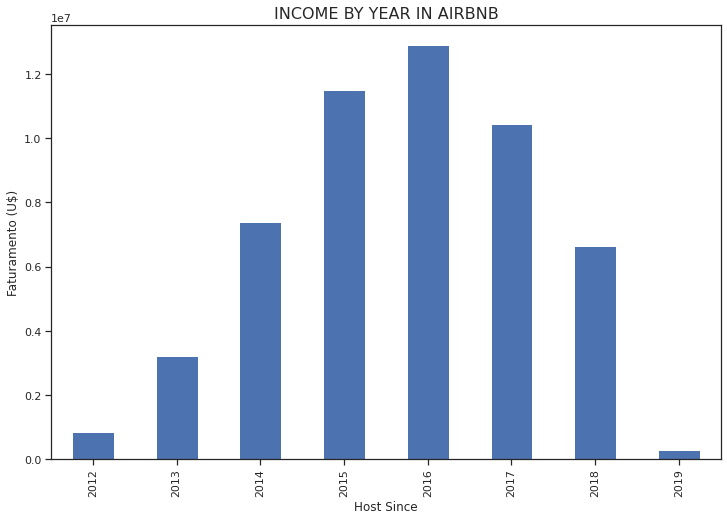

In [75]:
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb.groupby(airbnb['Host Since'].dt.year)['Revenue'].sum().plot.bar()
plt.ylabel('Faturamento (U$)')
plt.title('INCOME BY YEAR IN AIRBNB', size = 16)

## **2.2 Created columns with values 'Periodo', this columns is the multiply betwwen time (more recentrly time of the dataset with times if the columns'Host Since'.**

In [76]:
# Catching the start date and end Date in the Dataset
# Max and Min Date
df = airbnb.agg(Minimum_Date=('Host Since', np.min), 
                Maximum_Date=('Host Since', np.max))

# Catching the Max date
df2 = airbnb.agg(Maximum_Date = ('Host Since', np.max))

# Show display the results
display(df)
display(df2)

,Host Since
Minimum_Date,2012-01-17
Maximum_Date,2019-03-19


,Host Since
Maximum_Date,2019-03-19


In [77]:
# Created Variables 
airbnb['P_days'] = (airbnb['Host Since'].max() - airbnb["Host Since"])
airbnb['P_year'] = (2018 - airbnb['Host Since'].dt.year)

airbnb['P_year'] = [1 if y == 0 else y for y in airbnb['P_year']]
airbnb.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year
1,2012-01-17,Manhattan,Apartment,Private room,39,549,96.0,21411,2618 days,6
2,2012-02-15,Brooklyn,Apartment,Entire home/apt,4,149,100.0,596,2589 days,6
3,2012-03-04,Manhattan,Apartment,Entire home/apt,9,250,100.0,2250,2571 days,6
4,2012-03-07,Brooklyn,Apartment,Private room,80,90,94.0,7200,2568 days,6
5,2012-03-12,Manhattan,Apartment,Entire home/apt,95,270,90.0,25650,2563 days,6


In [78]:
# if feature 'Periodo_years' is equal to inf, put in the rows '0', if not else put own value of the features.
#airbnb['Freq_years'] = airbnb['Freq_years'].map( lambda x: 0 if x == 'inf' else x)

# Created columns 'Freq_days' 
airbnb['Freq_years'] = round(airbnb['Number of Reviews'] / airbnb['P_year'],2)

# if feature 'Periodo_years' is equal to inf, put in the rows '0', if not else put own value of the features.
# airbnb['Freq_Bim'] = airbnb['Freq_Bim'].map( lambda x: 'Baixo' if x == 'NaN' else x)
# airbnb['Freq_Bim'] = ['Baixo' if y == 'None' else y for y in airbnb['Freq_Bim']]

airbnb.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years
1,2012-01-17,Manhattan,Apartment,Private room,39,549,96.0,21411,2618 days,6,6.50
2,2012-02-15,Brooklyn,Apartment,Entire home/apt,4,149,100.0,596,2589 days,6,0.67
3,2012-03-04,Manhattan,Apartment,Entire home/apt,9,250,100.0,2250,2571 days,6,1.50
4,2012-03-07,Brooklyn,Apartment,Private room,80,90,94.0,7200,2568 days,6,13.33
5,2012-03-12,Manhattan,Apartment,Entire home/apt,95,270,90.0,25650,2563 days,6,15.83


In [79]:
# Created columns 'Freq Bin', with the features 'Freq':

def Freq_Bim(row):
    if row['Freq_years'] >= 4:
        return 'Middle'
    elif row['Freq_years'] >= 10:
        return 'Hight'
    elif row['Freq_years'] < 4:
        return 'Low'
    else:
        'Low'

airbnb['Freq_Bim'] = airbnb.apply(Freq_Bim, axis = 1)

airbnb.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years,Freq_Bim
1,2012-01-17,Manhattan,Apartment,Private room,39,549,96.0,21411,2618 days,6,6.50,Middle
2,2012-02-15,Brooklyn,Apartment,Entire home/apt,4,149,100.0,596,2589 days,6,0.67,Low
3,2012-03-04,Manhattan,Apartment,Entire home/apt,9,250,100.0,2250,2571 days,6,1.50,Low
4,2012-03-07,Brooklyn,Apartment,Private room,80,90,94.0,7200,2568 days,6,13.33,Middle
5,2012-03-12,Manhattan,Apartment,Entire home/apt,95,270,90.0,25650,2563 days,6,15.83,Middle


In [80]:
# Looking for Missing Values
airbnb.isnull().sum()

Host Since           0
Neighbourhood        0
Property Type        0
Room Type            0
Number of Reviews    0
Price                0
Scores Rating        0
Revenue              0
P_days               0
P_year               0
Freq_years           0
Freq_Bim             0
dtype: int64

## **2.3 Created Columns with the conditions below:**
 * IF 'Score' bigger than 90, else 'High'
 * IF 'Score' bigger than 70, else 'Middle'
 * IF 'Score' less than 70, else 'Low'

In [81]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21540 entries, 1 to 29567
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Host Since         21540 non-null  datetime64[ns] 
 1   Neighbourhood      21540 non-null  object         
 2   Property Type      21540 non-null  object         
 3   Room Type          21540 non-null  object         
 4   Number of Reviews  21540 non-null  int64          
 5   Price              21540 non-null  int64          
 6   Scores Rating      21540 non-null  float64        
 7   Revenue            21540 non-null  int64          
 8   P_days             21540 non-null  timedelta64[ns]
 9   P_year             21540 non-null  int64          
 10  Freq_years         21540 non-null  float64        
 11  Freq_Bim           21540 non-null  object         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4), timedelta64[ns](1)
memory usage: 2.1+ MB


In [82]:
# Created other score

def Score_Bim(row):
    if row['Scores Rating'] >= 90:
        return 'Hight'

    elif row['Scores Rating'] >= 70:
        return 'Middle'

    elif row['Scores Rating'] < 70:
        return 'Low'
    else:
        'Low'

# Creating column with Score Bim
airbnb['Score_Bim'] = airbnb.apply(Score_Bim, axis = 1)

# Concat the two string
airbnb['Freq_Score'] = airbnb['Freq_Bim'] + '-' + airbnb['Score_Bim']

# Show the result
airbnb.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years,Freq_Bim,Score_Bim,Freq_Score
1,2012-01-17,Manhattan,Apartment,Private room,39,549,96.0,21411,2618 days,6,6.50,Middle,Hight,Middle-Hight
2,2012-02-15,Brooklyn,Apartment,Entire home/apt,4,149,100.0,596,2589 days,6,0.67,Low,Hight,Low-Hight
3,2012-03-04,Manhattan,Apartment,Entire home/apt,9,250,100.0,2250,2571 days,6,1.50,Low,Hight,Low-Hight
4,2012-03-07,Brooklyn,Apartment,Private room,80,90,94.0,7200,2568 days,6,13.33,Middle,Hight,Middle-Hight
5,2012-03-12,Manhattan,Apartment,Entire home/apt,95,270,90.0,25650,2563 days,6,15.83,Middle,Hight,Middle-Hight


 * Created columns 'Freq Bin', with the features 'Freq'
 

|       If        | Frequencty     | Score             | Else       |
|-----------------|----------------|-------------------|------------|
| `if`            | `Low`          | *Low*             | Number 1   |
| `if`            | `Low`          | *Middle*          | Number 2   |
| `if`            | `Low`          | *Hight*           | Number 3   | 
| `if`            | `Middle`       | *Low*             | Number 4   |
| `if`            | `Middle`       | *Middle*          | Number 5   |
| `if`            | `Middle`       | *Hight*           | Number 6   |
| `if`            | `Hight`        | *Low*             | Number 7   |
| `if`            | `Hight`        | *Middle*          | Number 8   |
| `if`            | `Hight`        | *Hight*           | Number 9   |



In [83]:
# Creating KPI Score
def KPI_Freq_Score(row):
    if row['Freq_Score'] == 'Low-Low':
        return 1
    elif row['Freq_Score'] == 'Low-Middle':
        return 2
    elif row['Freq_Score'] == 'Low-Hight':
        return 3
    elif row['Freq_Score'] == 'Middle-Low':
        return 4
    elif row['Freq_Score'] == 'Middle-Middle':
        return 5
    elif row['Freq_Score'] == 'Middle-Hight':
        return 6
    elif row['Freq_Score'] == 'Hight-Low':
        return 7
    elif row['Freq_Score'] == 'Hight-Middle':
        return 8
    elif row['Freq_Score'] == 'Hight-Hight':
        return 9
    
airbnb['KPI_Freq_Score'] = airbnb.apply(KPI_Freq_Score, axis = 1)

airbnb.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years,Freq_Bim,Score_Bim,Freq_Score,KPI_Freq_Score
1,2012-01-17,Manhattan,Apartment,Private room,39,549,96.0,21411,2618 days,6,6.50,Middle,Hight,Middle-Hight,6
2,2012-02-15,Brooklyn,Apartment,Entire home/apt,4,149,100.0,596,2589 days,6,0.67,Low,Hight,Low-Hight,3
3,2012-03-04,Manhattan,Apartment,Entire home/apt,9,250,100.0,2250,2571 days,6,1.50,Low,Hight,Low-Hight,3
4,2012-03-07,Brooklyn,Apartment,Private room,80,90,94.0,7200,2568 days,6,13.33,Middle,Hight,Middle-Hight,6
5,2012-03-12,Manhattan,Apartment,Entire home/apt,95,270,90.0,25650,2563 days,6,15.83,Middle,Hight,Middle-Hight,6


In [84]:
# Is not Null, this can be prejudice the future analysis
airbnb.isnull().sum()

Host Since           0
Neighbourhood        0
Property Type        0
Room Type            0
Number of Reviews    0
Price                0
Scores Rating        0
Revenue              0
P_days               0
P_year               0
Freq_years           0
Freq_Bim             0
Score_Bim            0
Freq_Score           0
KPI_Freq_Score       0
dtype: int64

# **3. Exploratory Data Analyse: AirBnB**

## **3.1 Creating Insights with the Organization of the DatasSet**

* Creating table about the mean 'Price', mean 'Revenue' and mean 'Score' about the note consumers given to the stay in the New York City neighborhoods.

* What knowledge do you see here?   
* It is useful for making decision?  
* The revenue of the is more in the assets rotation or in the asset margin?  

In [85]:
# Price and Revenue from Room Type
round(airbnb.groupby(['Neighbourhood' ,
                      'Property Type',
                      'Room Type']).agg({'Price': np.mean,
                                         'Revenue': np.mean,
                                         'KPI_Freq_Score': np.mean}),
       2)

Price   Revenue  KPI_Freq_Score
Neighbourhood Property Type   Room Type                                        
Bronx         Apartment       Entire home/apt  116.33   1087.41            4.36
                              Private room      60.76    957.38            4.05
              Bed & Breakfast Private room      75.00    192.50            3.00
              Condominium     Private room     127.00    127.00            2.00
              House           Entire home/apt  142.77   4130.62            4.23
                              Private room      58.63    976.12            4.53
              Loft            Entire home/apt  146.67    756.67            3.67
                              Private room      61.50    513.00            4.00
              Townhouse       Entire home/apt  110.00    330.00            3.00
Brooklyn      Apartment       Entire home/apt  162.12   2469.91            4.25
                              Private room      77.74   1202.61            4.20
              Bed & Breakfast Entire home/apt  145.83   6370.00            5.00
                              Private room      82.27   2077.17            4.58
              Condominium     Entire home/apt  211.64   2685.55            4.36
                              Private room      82.33   2803.50            4.00
              House           Entire home/apt  233.74   4137.58            4.55
                              Private room      79.53   1690.39            4.26
              Loft            Entire home/apt  209.97   3498.66            4.45
                              Private room      90.14   1847.71            4.38
              Townhouse       Entire home/apt  213.26    797.48            3.55
                              Private room      88.80   1002.73            3.87
Manhattan     Apartment       Entire home/apt  216.14   3375.40            4.39
                              Private room     103.07   1841.79            4.31
              Bed & Breakfast Entire home/apt  292.50  18391.25            5.75
                              Private room     124.93   3692.16            5.05
              Condominium     Entire home/apt  281.80   1288.40            3.32
                              Private room      84.33    332.67            4.33
              House           Entire home/apt  361.82   6498.94            4.77
                              Private room     105.69   2024.41            4.76
              Loft            Entire home/apt  394.58   7889.60            4.71
                              Private room     135.81   4846.67            4.62
              Townhouse       Entire home/apt  368.56   1589.50            3.67
                              Private room      68.25    605.67            4.67
Queens        Apartment       Entire home/apt  129.96   1627.40            4.28
                              Private room      70.90   1110.66            4.28
              Bed & Breakfast Entire home/apt  112.50   1107.50            4.00
                              Private room      70.48    906.68            4.56
              Condominium     Entire home/apt  168.50    846.00            4.50
              House           Entire home/apt  176.91   2935.89            4.47
                              Private room      65.12   1349.09            4.49
              Loft            Entire home/apt  178.67   4684.83            5.00
                              Private room      75.43   1041.86            4.00
              Townhouse       Entire home/apt  100.00    100.00            2.00
                              Private room      67.50   2947.50            3.50
Staten Island Apartment       Entire home/apt  126.40   1765.70            4.75
                              Private room      48.85   2011.69            4.92
              Bed & Breakfast Entire home/apt  129.00    516.00            6.00
              House           Entire home/apt  190.32   2167.32            4.16
                              Private room      

In [86]:
# Creating a new DataFrame for Analyses correlation between features
airbnb_plot = airbnb[['Property Type', 
                      'Room Type', 
                      'Freq_years',
                      'Scores Rating', 
                      'Price', 
                      'Revenue']
                     ]

# Vizualizing the new DataFrame
airbnb_plot.head(3)

,Property Type,Room Type,Freq_years,Scores Rating,Price,Revenue
1,Apartment,Private room,6.50,96.0,549,21411
2,Apartment,Entire home/apt,0.67,100.0,149,596
3,Apartment,Entire home/apt,1.50,100.0,250,2250


## **3.2. Data Analyses about Dataset**

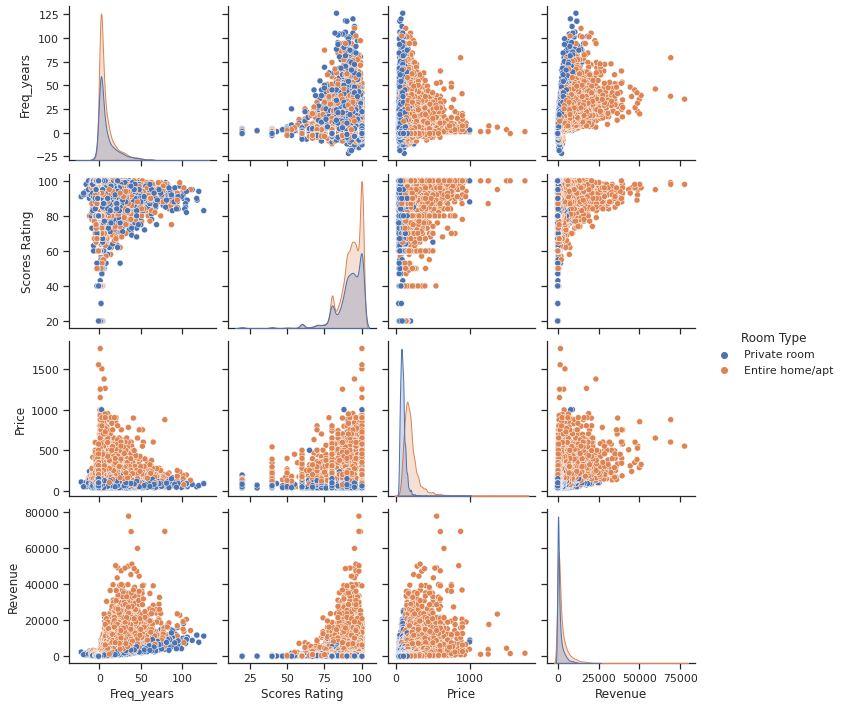

In [87]:
# Generated Graphics
sns.set_theme(style="ticks")
sns.pairplot(airbnb_plot, hue = "Room Type")

In [88]:
round(airbnb.describe(),2)

,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years,KPI_Freq_Score
count,21540.00,21540.00,21540.00,21540.00,21540,21540.00,21540.00,21540.00
mean,16.57,154.26,92.04,2472.18,860 days 18:03:52.646238896,1.87,9.23,4.32
std,24.39,104.54,8.78,4151.30,534 days 02:29:05.858088696,1.28,12.99,1.58
min,1.00,27.00,20.00,35.00,0 days 00:00:00,-1.00,-22.00,1.00
25%,3.00,85.00,89.00,300.00,412 days 00:00:00,1.00,1.50,3.00
50%,7.00,130.00,94.00,949.00,810 days 00:00:00,2.00,4.00,5.00
75%,20.00,190.00,100.00,2820.00,1223 days 00:00:00,3.00,11.67,6.00
max,257.00,1750.00,100.00,77550.00,2618 days 00:00:00,6.00,126.00,6.00


Text(0.5, 1.0, 'REVENUE BY YEAR IN AIRBNB')

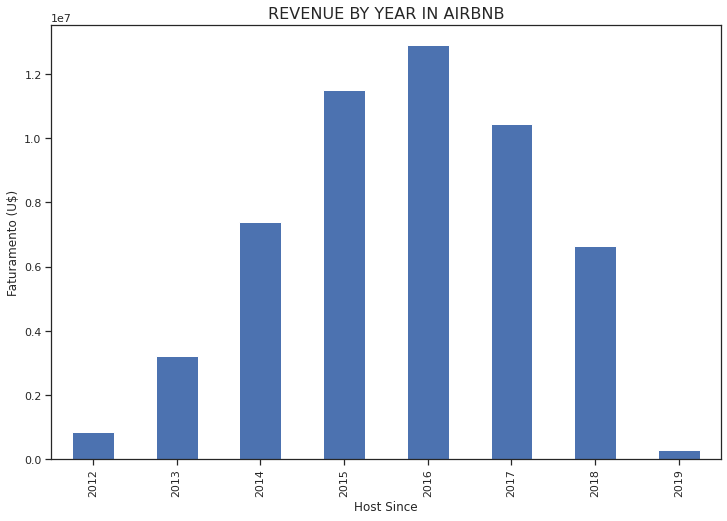

In [89]:
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb.groupby(airbnb['Host Since'].dt.year)['Revenue'].sum().plot.bar()
plt.ylabel('Faturamento (U$)')
plt.title('REVENUE BY YEAR IN AIRBNB', size = 16)

Text(0.5, 1.0, 'AIRBNB BY FATURAMENTO FROM ROOM TYPE')

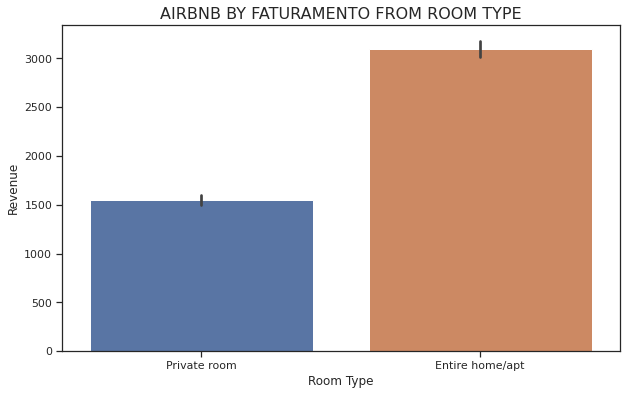

In [90]:
# AirBnB by Room Type by Faturamento
plt.figure(figsize=(10,6))
sns.barplot(data = airbnb, 
           x = 'Room Type', 
           y = 'Revenue').set_title('AIRBNB BY FATURAMENTO FROM ROOM TYPE', size = 16)

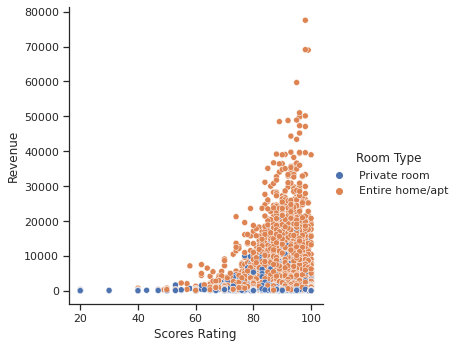

In [91]:
sns.relplot(x = 'Scores Rating', 
           y = 'Revenue', 
           hue = 'Room Type', 
           data = airbnb)

In [92]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21540 entries, 1 to 29567
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Host Since         21540 non-null  datetime64[ns] 
 1   Neighbourhood      21540 non-null  object         
 2   Property Type      21540 non-null  object         
 3   Room Type          21540 non-null  object         
 4   Number of Reviews  21540 non-null  int64          
 5   Price              21540 non-null  int64          
 6   Scores Rating      21540 non-null  float64        
 7   Revenue            21540 non-null  int64          
 8   P_days             21540 non-null  timedelta64[ns]
 9   P_year             21540 non-null  int64          
 10  Freq_years         21540 non-null  float64        
 11  Freq_Bim           21540 non-null  object         
 12  Score_Bim          21540 non-null  object         
 13  Freq_Score         21540 non-null  object     

Text(0.5, 1.0, 'INCOME BY NEIGHBOURHOOD IN AIRBNB')

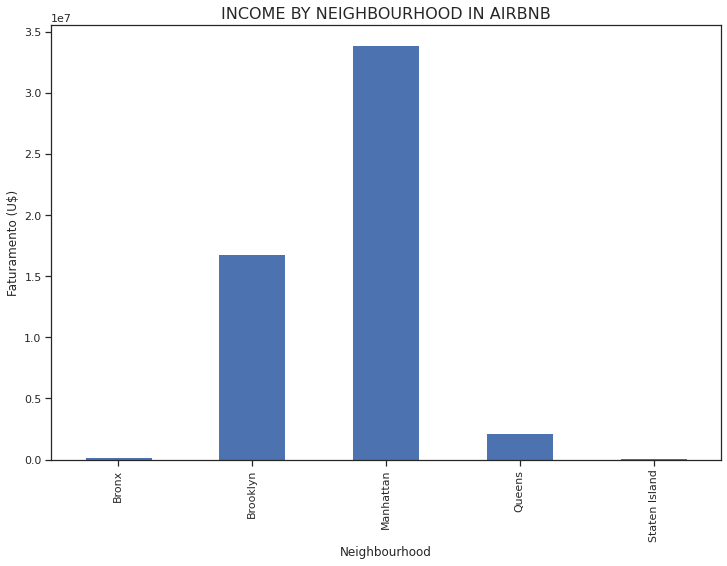

In [93]:
# AirBnB by Room Type in dataset
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb.groupby(airbnb['Neighbourhood'])['Revenue'].sum().plot.bar()
plt.ylabel('Faturamento (U$)')
plt.title('INCOME BY NEIGHBOURHOOD IN AIRBNB', size = 16)

# **4. Analyses from Neighbourhood**

![STATEN ISLAND](https://www1.nyc.gov/assets/planning/images/content/pages/data-maps/maps-geography/city-neighborhoods/mapview.jpg)  
**Fonte:** Google Images

## **4.1 Neighbourhood: Staten Island**

In [94]:
airbnb_staten = airbnb[ airbnb['Neighbourhood'].str.contains('Staten Island')]
airbnb_staten.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years,Freq_Bim,Score_Bim,Freq_Score,KPI_Freq_Score
134,2012-11-21,Staten Island,House,Private room,7,69,97.0,483,2309 days,6,1.17,Low,Hight,Low-Hight,3
319,2013-05-11,Staten Island,House,Entire home/apt,40,70,98.0,2800,2138 days,5,8.00,Middle,Hight,Middle-Hight,6
958,2014-01-21,Staten Island,House,Entire home/apt,13,70,94.0,910,1883 days,4,3.25,Low,Hight,Low-Hight,3
1106,2014-02-19,Staten Island,Apartment,Private room,104,70,96.0,7280,1854 days,4,26.00,Middle,Hight,Middle-Hight,6
1712,2014-06-21,Staten Island,House,Private room,55,39,88.0,2145,1732 days,4,13.75,Middle,Middle,Middle-Middle,5


Text(0.5, 1.0, 'REVENUE BY YEAR IN STATEN ISLAND')

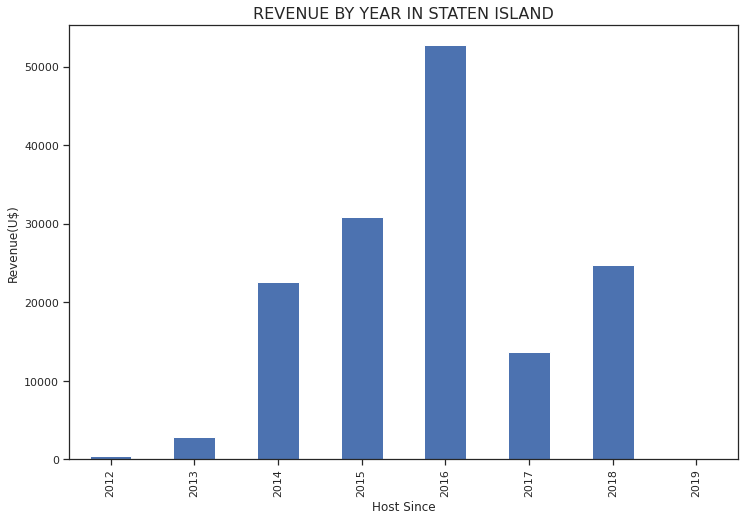

In [95]:
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb_staten.groupby(airbnb_staten['Host Since'].dt.year)['Revenue'].sum().plot.bar()
plt.ylabel('Revenue(U$)')
plt.title('REVENUE BY YEAR IN STATEN ISLAND', size = 16)

In [96]:
# Price and Revenue from Room Type
round(airbnb_staten.groupby(['Property Type','Room Type']).agg({'Price': np.mean,'Revenue': np.mean, 'KPI_Freq_Score': np.mean} ), 2)

Price  Revenue  KPI_Freq_Score
Property Type   Room Type                                       
Apartment       Entire home/apt  126.40  1765.70            4.75
                Private room      48.85  2011.69            4.92
Bed & Breakfast Entire home/apt  129.00   516.00            6.00
House           Entire home/apt  190.32  2167.32            4.16
                Private room      62.15  1090.41            4.49
Townhouse       Private room      57.00   114.00            3.00

Text(0.5, 1.0, 'INCOME BY ROOM TYPE IN STATEN ISLAND')

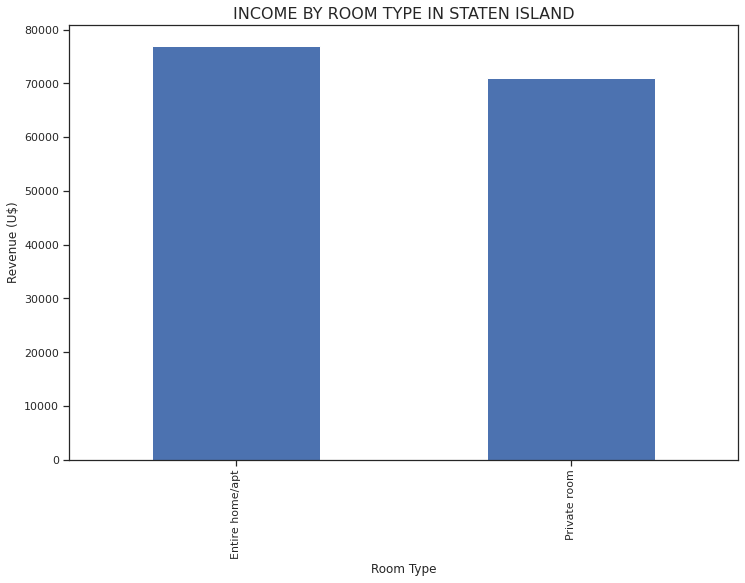

In [97]:
# AirBnB by Room Type in dataset
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb_staten.groupby(airbnb_staten['Room Type'])['Revenue'].sum().plot.bar()
plt.ylabel('Revenue (U$)')
plt.title('INCOME BY ROOM TYPE IN STATEN ISLAND', size = 16)

Text(0.5, 1.0, 'BOXPLOT: REVENUE BY ROOM TYPE IN STATEN ISLAND')

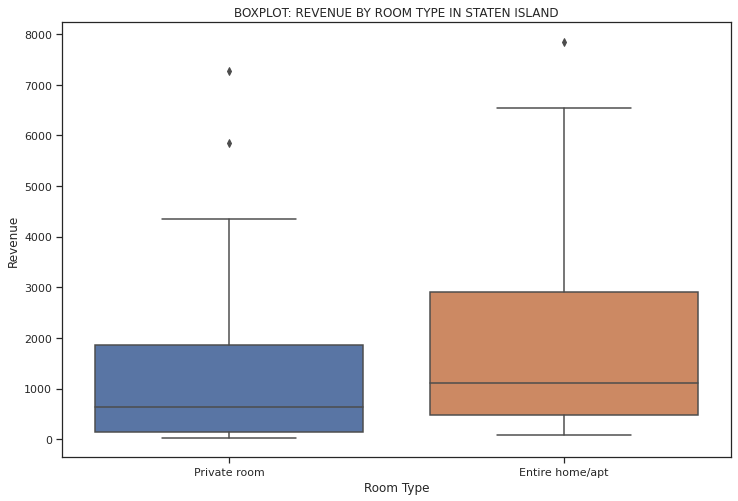

In [98]:
# Show Boxplot Revenue by Room Type
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Room Type', 
            y = 'Revenue', 
            data = airbnb_staten).set_title('BOXPLOT: REVENUE BY ROOM TYPE IN STATEN ISLAND', size = 12)

Text(0.5, 1.0, 'BARPLOT: REVENUE BY PROPERTY TYPE IN STATEN ISLAND')

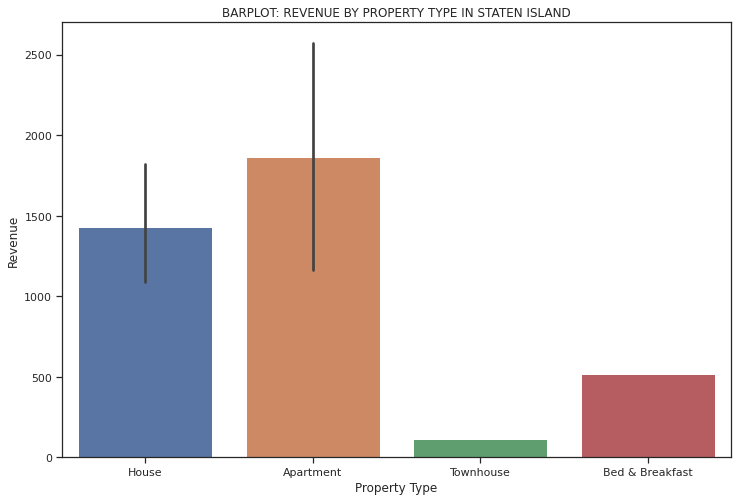

In [99]:
# Show Barplot Revenue by Property Type
plt.figure(figsize=(12,8))
sns.barplot(x = 'Property Type', 
            y = 'Revenue', 
            data = airbnb_staten).set_title('BARPLOT: REVENUE BY PROPERTY TYPE IN STATEN ISLAND', size = 12)

## **4.2 Neighbourhood: Queens**

In [100]:
airbnb_queen = airbnb[ airbnb['Neighbourhood'].str.contains('Queens')]
airbnb_queen.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years,Freq_Bim,Score_Bim,Freq_Score,KPI_Freq_Score
14,2012-04-17,Queens,Apartment,Private room,3,100,93.0,300,2527 days,6,0.50,Low,Hight,Low-Hight,3
21,2012-05-06,Queens,Apartment,Entire home/apt,4,89,93.0,356,2508 days,6,0.67,Low,Hight,Low-Hight,3
22,2012-05-06,Queens,Apartment,Entire home/apt,16,95,94.0,1520,2508 days,6,2.67,Low,Hight,Low-Hight,3
23,2012-05-06,Queens,Apartment,Entire home/apt,9,99,100.0,891,2508 days,6,1.50,Low,Hight,Low-Hight,3
45,2012-07-25,Queens,Apartment,Entire home/apt,47,135,86.0,6345,2428 days,6,7.83,Middle,Middle,Middle-Middle,5


Text(0.5, 1.0, 'REVENUE BY YEAR IN QUEENS')

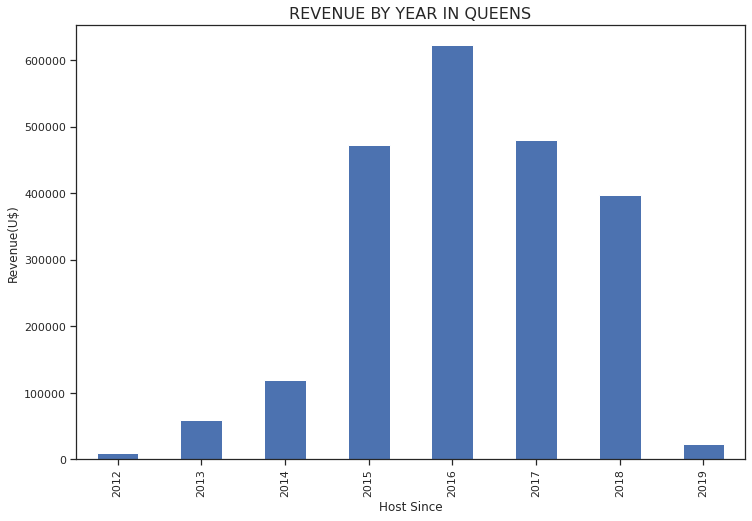

In [101]:
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb_queen.groupby(airbnb_queen['Host Since'].dt.year)['Revenue'].sum().plot.bar()
plt.ylabel('Revenue(U$)')
plt.title('REVENUE BY YEAR IN QUEENS', size = 16)

In [102]:
# Price and Revenue from Room Type
round(airbnb_queen.groupby(['Property Type','Room Type']).agg({'Price': np.mean,'Revenue': np.mean, 'KPI_Freq_Score': np.mean} ), 2)

Price  Revenue  KPI_Freq_Score
Property Type   Room Type                                       
Apartment       Entire home/apt  129.96  1627.40            4.28
                Private room      70.90  1110.66            4.28
Bed & Breakfast Entire home/apt  112.50  1107.50            4.00
                Private room      70.48   906.68            4.56
Condominium     Entire home/apt  168.50   846.00            4.50
House           Entire home/apt  176.91  2935.89            4.47
                Private room      65.12  1349.09            4.49
Loft            Entire home/apt  178.67  4684.83            5.00
                Private room      75.43  1041.86            4.00
Townhouse       Entire home/apt  100.00   100.00            2.00
                Private room      67.50  2947.50            3.50

Text(0.5, 1.0, 'INCOME BY ROOM TYPE IN QUEENS')

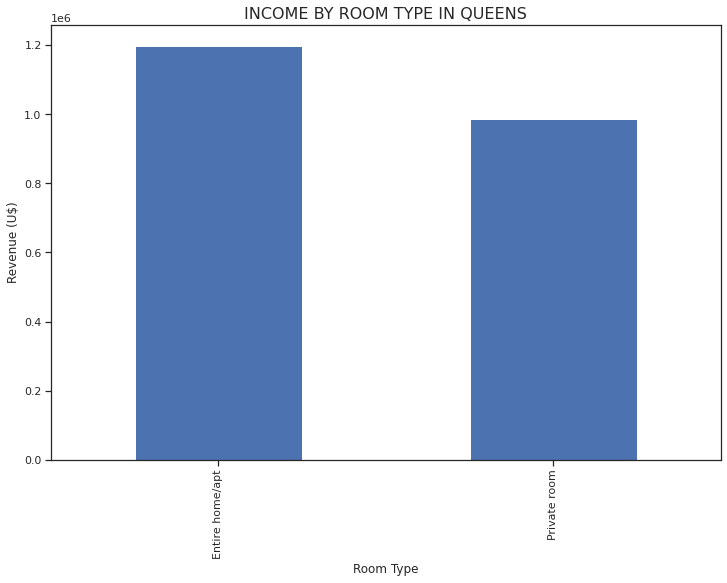

In [103]:
# AirBnB by Room Type in dataset
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb_queen.groupby(airbnb_queen['Room Type'])['Revenue'].sum().plot.bar()
plt.ylabel('Revenue (U$)')
plt.title('INCOME BY ROOM TYPE IN QUEENS', size = 16)

Text(0.5, 1.0, 'BOXPLOT: REVENUE BY ROOM TYPE IN QUEENS')

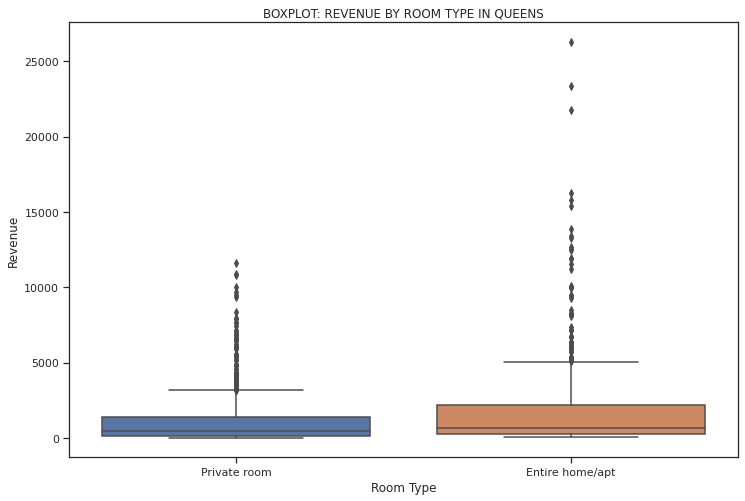

In [104]:
# Show Boxplot Revenue by Room Type
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Room Type', 
            y = 'Revenue', 
            data = airbnb_queen).set_title('BOXPLOT: REVENUE BY ROOM TYPE IN QUEENS', size = 12)

Text(0.5, 1.0, 'BARPLOT: REVENUE BY PROPERTY TYPE IN QUEENS')

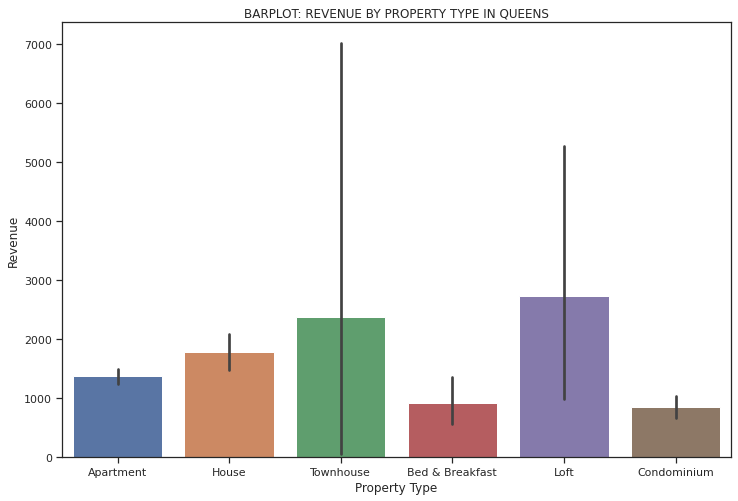

In [105]:
# Show Barplot Revenue by Property Type
plt.figure(figsize=(12,8))
sns.barplot(x = 'Property Type', 
            y = 'Revenue', 
            data = airbnb_queen).set_title('BARPLOT: REVENUE BY PROPERTY TYPE IN QUEENS', size = 12)

Text(0.5, 1.0, 'REVENUE DISPERSION BY ROOM TYPE IN QUEENS')

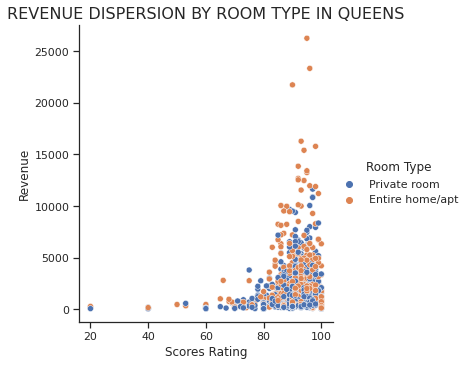

In [106]:
sns.relplot(x = 'Scores Rating', 
           y = 'Revenue', 
           hue = 'Room Type', 
           data = airbnb_queen)
plt.title('REVENUE DISPERSION BY ROOM TYPE IN QUEENS', size = 16)

## **4.3 Neighbourhood: Manhattan**

In [107]:
airbnb_manhatt = airbnb[ airbnb['Neighbourhood'].str.contains('Manhattan')]
airbnb_manhatt.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years,Freq_Bim,Score_Bim,Freq_Score,KPI_Freq_Score
1,2012-01-17,Manhattan,Apartment,Private room,39,549,96.0,21411,2618 days,6,6.50,Middle,Hight,Middle-Hight,6
3,2012-03-04,Manhattan,Apartment,Entire home/apt,9,250,100.0,2250,2571 days,6,1.50,Low,Hight,Low-Hight,3
5,2012-03-12,Manhattan,Apartment,Entire home/apt,95,270,90.0,25650,2563 days,6,15.83,Middle,Hight,Middle-Hight,6
6,2012-03-12,Manhattan,Apartment,Entire home/apt,23,290,96.0,6670,2563 days,6,3.83,Low,Hight,Low-Hight,3
8,2012-03-29,Manhattan,Apartment,Private room,120,59,93.0,7080,2546 days,6,20.00,Middle,Hight,Middle-Hight,6


Text(0.5, 1.0, 'REVENUE BY YEAR IN MANHATTAN')

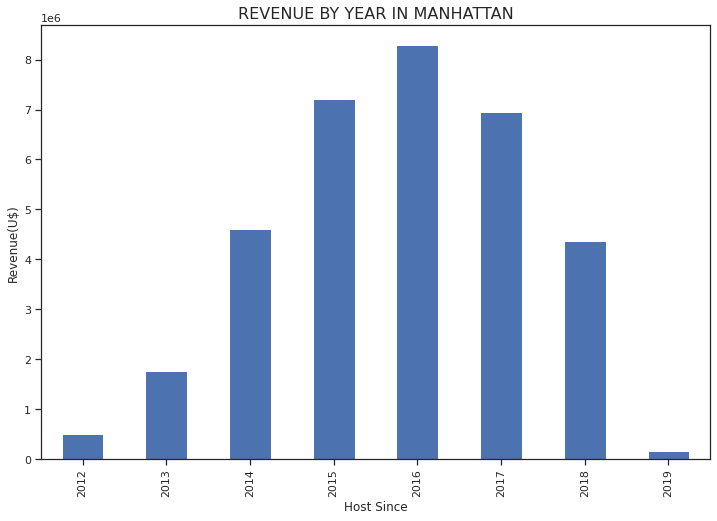

In [108]:
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb_manhatt.groupby(airbnb_manhatt['Host Since'].dt.year)['Revenue'].sum().plot.bar()
plt.ylabel('Revenue(U$)')
plt.title('REVENUE BY YEAR IN MANHATTAN', size = 16)

In [109]:
# Price and Revenue from Room Type
round(airbnb_manhatt.groupby(['Property Type','Room Type']).agg({'Price': np.mean,'Revenue': np.mean, 'KPI_Freq_Score': np.mean} ), 2)

Price   Revenue  KPI_Freq_Score
Property Type   Room Type                                        
Apartment       Entire home/apt  216.14   3375.40            4.39
                Private room     103.07   1841.79            4.31
Bed & Breakfast Entire home/apt  292.50  18391.25            5.75
                Private room     124.93   3692.16            5.05
Condominium     Entire home/apt  281.80   1288.40            3.32
                Private room      84.33    332.67            4.33
House           Entire home/apt  361.82   6498.94            4.77
                Private room     105.69   2024.41            4.76
Loft            Entire home/apt  394.58   7889.60            4.71
                Private room     135.81   4846.67            4.62
Townhouse       Entire home/apt  368.56   1589.50            3.67
                Private room      68.25    605.67            4.67

Text(0.5, 1.0, 'INCOME BY ROOM TYPE IN MANHATTAN')

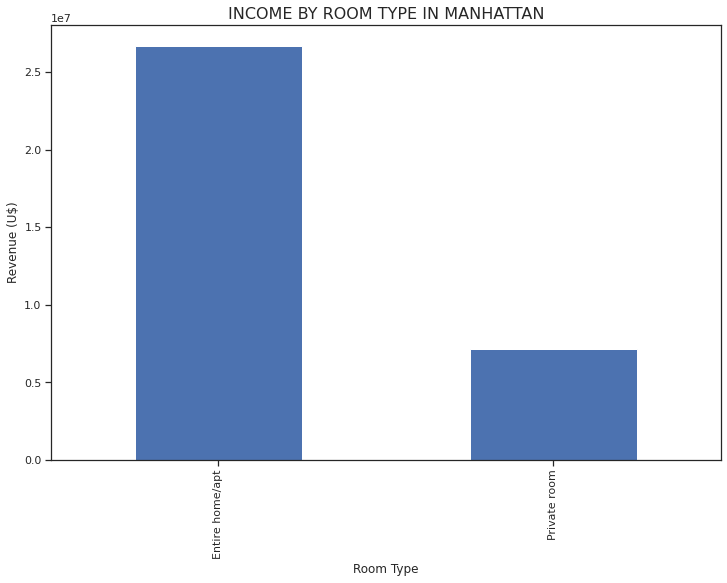

In [110]:
# AirBnB by Room Type in dataset
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb_manhatt.groupby(airbnb_manhatt['Room Type'])['Revenue'].sum().plot.bar()
plt.ylabel('Revenue (U$)')
plt.title('INCOME BY ROOM TYPE IN MANHATTAN', size = 16)

Text(0.5, 1.0, 'BOXPLOT: REVENUE BY ROOM TYPE')

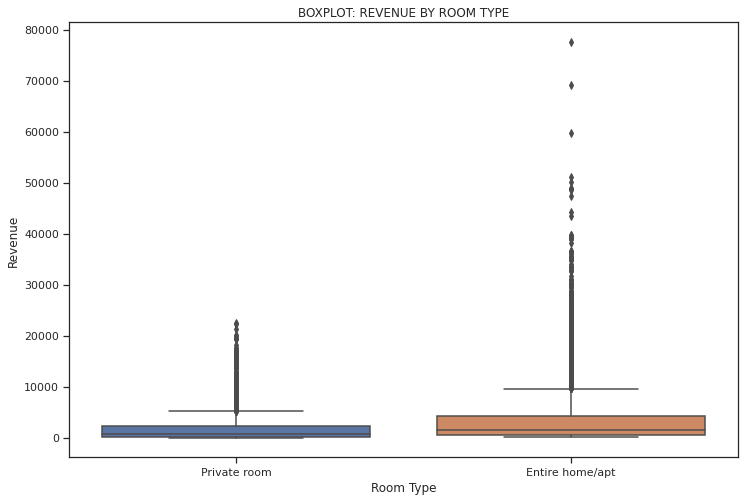

In [111]:
# Show Boxplot Revenue by Room Type
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Room Type', 
            y = 'Revenue', 
            data = airbnb_manhatt).set_title('BOXPLOT: REVENUE BY ROOM TYPE', size = 12)

Text(0.5, 1.0, 'BARPLOT: REVENUE BY PROPERTY TYPE')

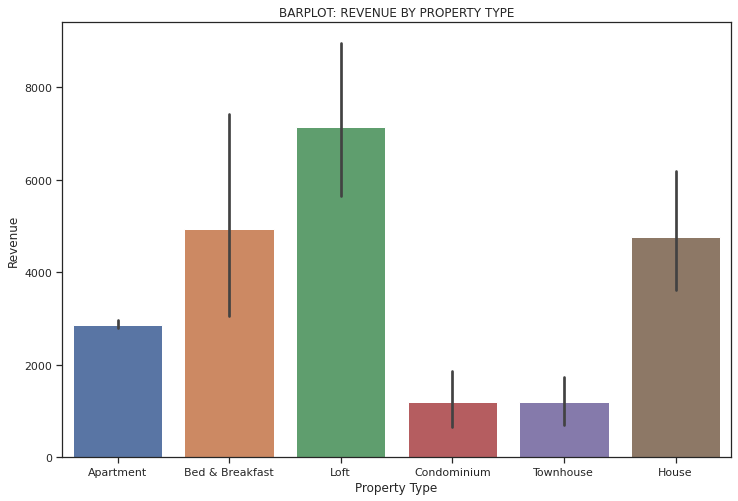

In [112]:
# Show Barplot Revenue by Property Type
plt.figure(figsize=(12,8))
sns.barplot(x = 'Property Type', 
            y = 'Revenue', 
            data = airbnb_manhatt).set_title('BARPLOT: REVENUE BY PROPERTY TYPE', size = 12)

Text(0.5, 1.0, 'REVENUE DISPERSION BY ROOM TYPE IN MANHATTAN')

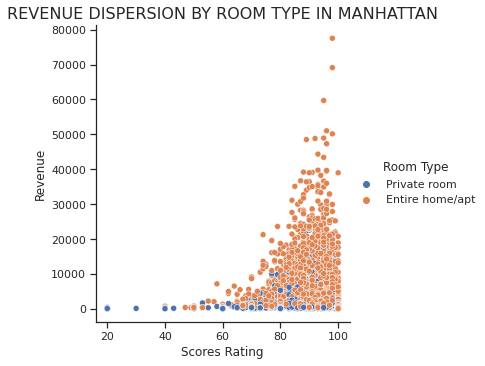

In [113]:
sns.relplot(x = 'Scores Rating', 
           y = 'Revenue', 
           hue = 'Room Type', 
           data = airbnb_manhatt)
plt.title('REVENUE DISPERSION BY ROOM TYPE IN MANHATTAN', size = 16)

## **4.4 Neighbourhood: Bronx**

In [114]:
airbnb_bronx = airbnb[ airbnb['Neighbourhood'].str.contains('Bronx')]
airbnb_bronx.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years,Freq_Bim,Score_Bim,Freq_Score,KPI_Freq_Score
117,2012-10-25,Bronx,Apartment,Private room,105,42,81.0,4410,2336 days,6,17.5,Middle,Middle,Middle-Middle,5
118,2012-10-25,Bronx,Apartment,Private room,96,42,87.0,4032,2336 days,6,16.0,Middle,Middle,Middle-Middle,5
731,2013-11-06,Bronx,Apartment,Entire home/apt,24,76,92.0,1824,1959 days,5,4.8,Middle,Hight,Middle-Hight,6
732,2013-11-06,Bronx,House,Private room,27,44,93.0,1188,1959 days,5,5.4,Middle,Hight,Middle-Hight,6
733,2013-11-06,Bronx,House,Private room,16,55,93.0,880,1959 days,5,3.2,Low,Hight,Low-Hight,3


Text(0.5, 1.0, 'REVENUE BY YEAR IN BRONX')

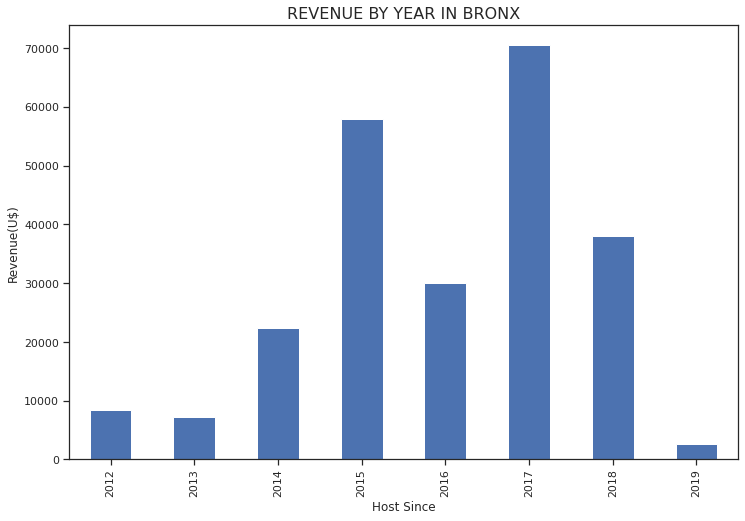

In [115]:
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb_bronx.groupby(airbnb_bronx['Host Since'].dt.year)['Revenue'].sum().plot.bar()
plt.ylabel('Revenue(U$)')
plt.title('REVENUE BY YEAR IN BRONX', size = 16)

In [116]:
# Price and Revenue from Room Type
round(airbnb_bronx.groupby(['Property Type','Room Type']).agg({'Price': np.mean,'Revenue': np.mean, 'KPI_Freq_Score': np.mean} ), 2)

Price  Revenue  KPI_Freq_Score
Property Type   Room Type                                       
Apartment       Entire home/apt  116.33  1087.41            4.36
                Private room      60.76   957.38            4.05
Bed & Breakfast Private room      75.00   192.50            3.00
Condominium     Private room     127.00   127.00            2.00
House           Entire home/apt  142.77  4130.62            4.23
                Private room      58.63   976.12            4.53
Loft            Entire home/apt  146.67   756.67            3.67
                Private room      61.50   513.00            4.00
Townhouse       Entire home/apt  110.00   330.00            3.00

Text(0.5, 1.0, 'INCOME BY ROOM TYPE IN BRONX')

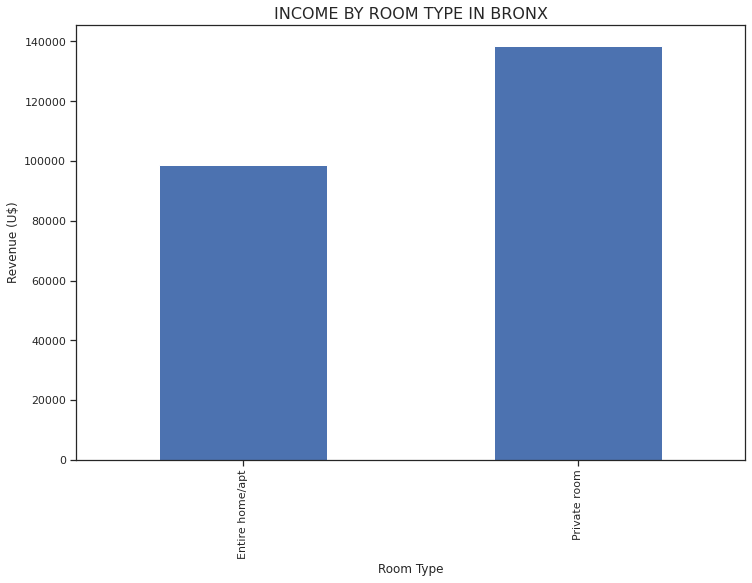

In [117]:
# AirBnB by Room Type in dataset
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb_bronx.groupby(airbnb_bronx['Room Type'])['Revenue'].sum().plot.bar()
plt.ylabel('Revenue (U$)')
plt.title('INCOME BY ROOM TYPE IN BRONX', size = 16)

Text(0.5, 1.0, 'BOXPLOT: REVENUE BY ROOM TYPE IN BRONX')

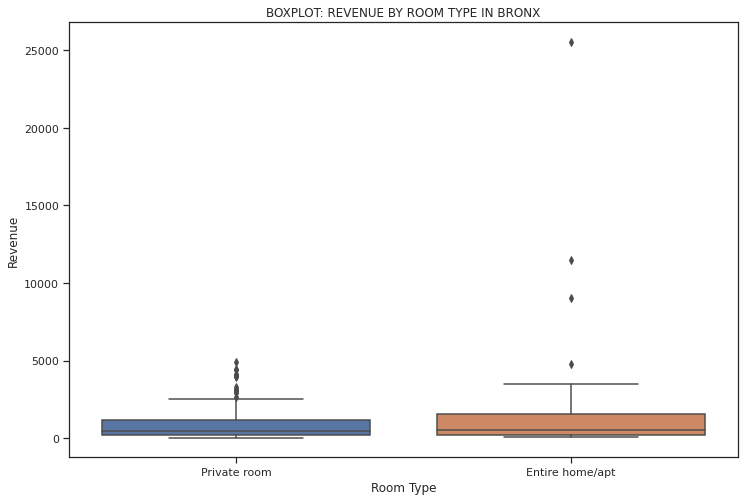

In [118]:
# Show Boxplot Revenue by Room Type
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Room Type', 
            y = 'Revenue', 
            data = airbnb_bronx).set_title('BOXPLOT: REVENUE BY ROOM TYPE IN BRONX', size = 12)

Text(0.5, 1.0, 'BARPLOT: REVENUE BY PROPERTY TYPE IN BRONX')

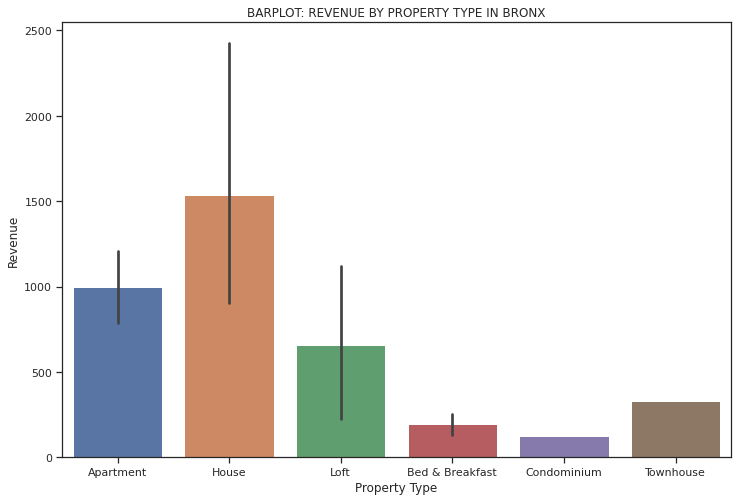

In [119]:
# Show Barplot Revenue by Property Type
plt.figure(figsize=(12,8))
sns.barplot(x = 'Property Type', 
            y = 'Revenue', 
            data = airbnb_bronx).set_title('BARPLOT: REVENUE BY PROPERTY TYPE IN BRONX', size = 12)

Text(0.5, 1.0, 'REVENUE DISPERSION BY ROOM TYPE IN BRONX')

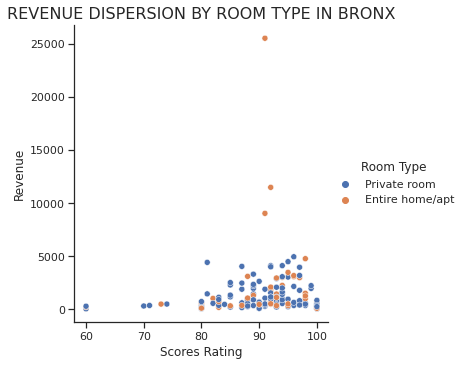

In [120]:
sns.relplot(x = 'Scores Rating', 
           y = 'Revenue', 
           hue = 'Room Type', 
           data = airbnb_bronx)
plt.title('REVENUE DISPERSION BY ROOM TYPE IN BRONX', size = 16)

## **4.5 Neighbourhood: Staten Brooklyn**

In [121]:
airbnb_brook = airbnb[ airbnb['Neighbourhood'].str.contains('Brooklyn')]
airbnb_brook.head()

,Host Since,Neighbourhood,Property Type,Room Type,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years,Freq_Bim,Score_Bim,Freq_Score,KPI_Freq_Score
2,2012-02-15,Brooklyn,Apartment,Entire home/apt,4,149,100.0,596,2589 days,6,0.67,Low,Hight,Low-Hight,3
4,2012-03-07,Brooklyn,Apartment,Private room,80,90,94.0,7200,2568 days,6,13.33,Middle,Hight,Middle-Hight,6
7,2012-03-19,Brooklyn,Apartment,Entire home/apt,14,170,98.0,2380,2556 days,6,2.33,Low,Hight,Low-Hight,3
12,2012-04-02,Brooklyn,Apartment,Private room,32,75,95.0,2400,2542 days,6,5.33,Middle,Hight,Middle-Hight,6
20,2012-05-02,Brooklyn,Apartment,Private room,1,40,100.0,40,2512 days,6,0.17,Low,Hight,Low-Hight,3


Text(0.5, 1.0, 'REVENUE BY YEAR IN BROOKLYN')

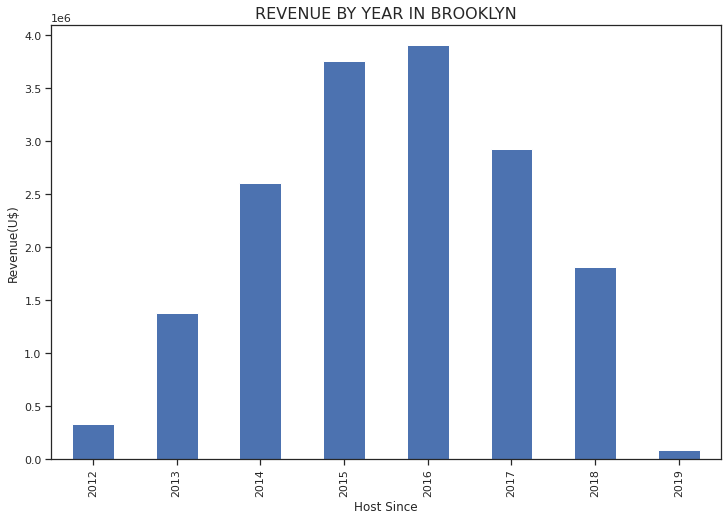

In [122]:
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb_brook.groupby(airbnb_brook['Host Since'].dt.year)['Revenue'].sum().plot.bar()
plt.ylabel('Revenue(U$)')
plt.title('REVENUE BY YEAR IN BROOKLYN', size = 16)

In [123]:
# Price and Revenue from Room Type
round(airbnb_brook.groupby(['Property Type','Room Type']).agg({'Price': np.mean,'Revenue': np.mean, 'KPI_Freq_Score': np.mean} ), 2)

Price  Revenue  KPI_Freq_Score
Property Type   Room Type                                       
Apartment       Entire home/apt  162.12  2469.91            4.25
                Private room      77.74  1202.61            4.20
Bed & Breakfast Entire home/apt  145.83  6370.00            5.00
                Private room      82.27  2077.17            4.58
Condominium     Entire home/apt  211.64  2685.55            4.36
                Private room      82.33  2803.50            4.00
House           Entire home/apt  233.74  4137.58            4.55
                Private room      79.53  1690.39            4.26
Loft            Entire home/apt  209.97  3498.66            4.45
                Private room      90.14  1847.71            4.38
Townhouse       Entire home/apt  213.26   797.48            3.55
                Private room      88.80  1002.73            3.87

Text(0.5, 1.0, 'INCOME BY ROOM TYPE IN BROOKLYN')

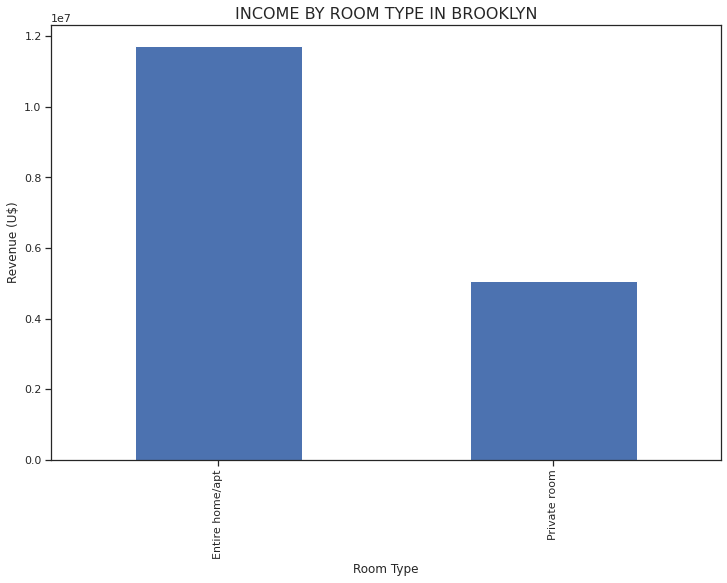

In [124]:
# AirBnB by Room Type in dataset
# OBS: Airbnb Income by years, in the 2019, the value in low because is not the intire year, maybe 2012 too.
plt.figure(figsize=(12,8))
airbnb_brook.groupby(airbnb_brook['Room Type'])['Revenue'].sum().plot.bar()
plt.ylabel('Revenue (U$)')
plt.title('INCOME BY ROOM TYPE IN BROOKLYN', size = 16)

Text(0.5, 1.0, 'BOXPLOT: REVENUE BY ROOM TYPE IN BROOKLYN')

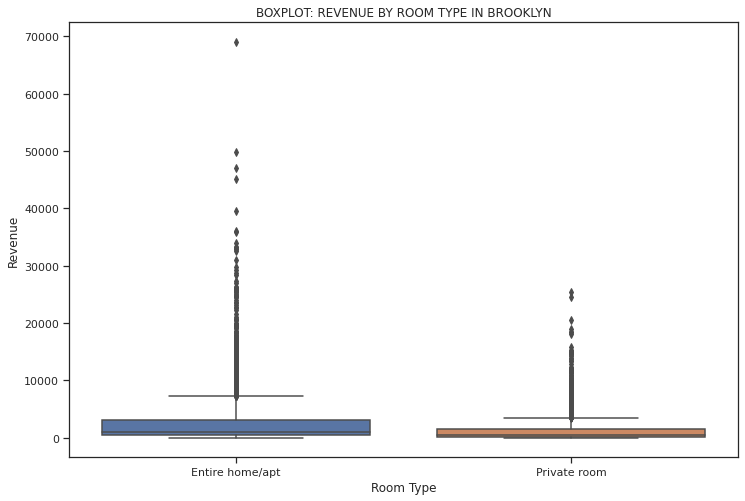

In [125]:
# Show Boxplot Revenue by Room Type
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Room Type', 
            y = 'Revenue', 
            data = airbnb_brook).set_title('BOXPLOT: REVENUE BY ROOM TYPE IN BROOKLYN', size = 12)

Text(0.5, 1.0, 'BARPLOT: REVENUE BY PROPERTY TYPE IN BROOKLYN')

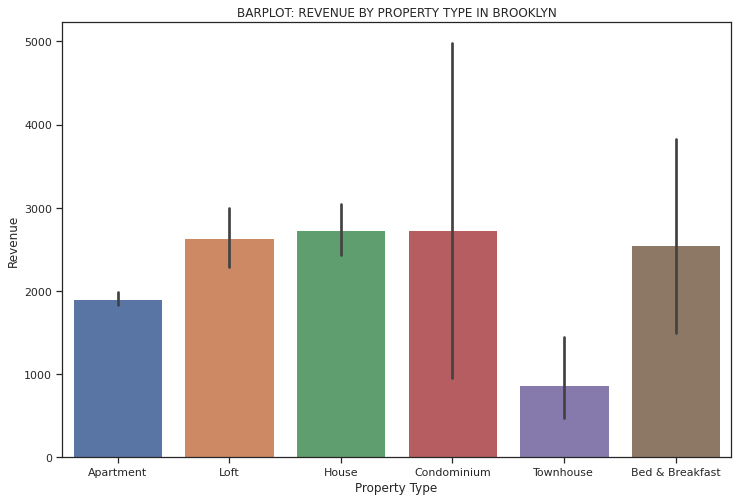

In [126]:
# Show Barplot Revenue by Property Type
plt.figure(figsize=(12,8))
sns.barplot(x = 'Property Type', 
            y = 'Revenue', 
            data = airbnb_brook).set_title('BARPLOT: REVENUE BY PROPERTY TYPE IN BROOKLYN', size = 12)

Text(0.5, 1.0, 'REVENUE DISPERSION BY ROOM TYPE IN BROOKLYN')

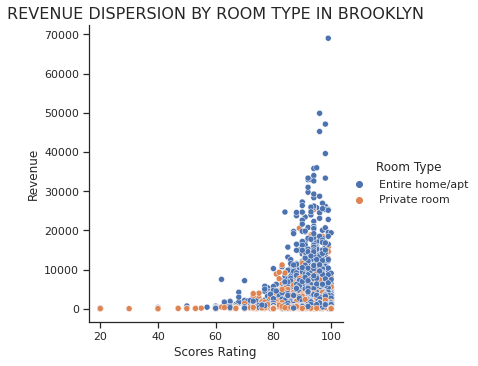

In [127]:
sns.relplot(x = 'Scores Rating', 
           y = 'Revenue', 
           hue = 'Room Type', 
           data = airbnb_brook)
plt.title('REVENUE DISPERSION BY ROOM TYPE IN BROOKLYN', size = 16)

Text(0.5, 1.0, 'BARPLOT: REVENUE BY PROPERTY TYPE IN BROOKLYN')

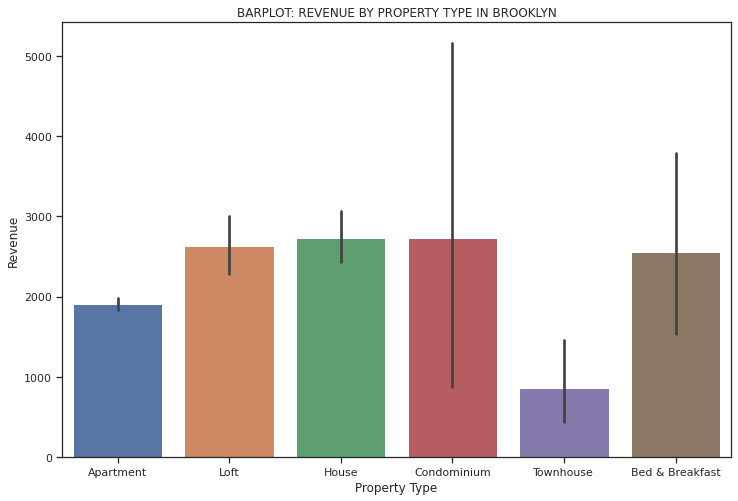

In [128]:
# Show Barplot Revenue by Property Type
plt.figure(figsize=(12,8))
sns.barplot(x = 'Property Type', 
            y = 'Revenue', 
            data = airbnb_brook).set_title('BARPLOT: REVENUE BY PROPERTY TYPE IN BROOKLYN', size = 12)

# **5. Predict future Revenue for AirBnB in New York City**

## **5.1 Descriptive Statistic**

In [129]:
round( airbnb.describe() )

,Number of Reviews,Price,Scores Rating,Revenue,P_days,P_year,Freq_years,KPI_Freq_Score
count,21540.0,21540.0,21540.0,21540.0,21540,21540.0,21540.0,21540.0
mean,17.0,154.0,92.0,2472.0,860 days 18:03:52.646238896,2.0,9.0,4.0
std,24.0,105.0,9.0,4151.0,534 days 02:29:05.858088696,1.0,13.0,2.0
min,1.0,27.0,20.0,35.0,0 days 00:00:00,-1.0,-22.0,1.0
25%,3.0,85.0,89.0,300.0,412 days 00:00:00,1.0,2.0,3.0
50%,7.0,130.0,94.0,949.0,810 days 00:00:00,2.0,4.0,5.0
75%,20.0,190.0,100.0,2820.0,1223 days 00:00:00,3.0,12.0,6.0
max,257.0,1750.0,100.0,77550.0,2618 days 00:00:00,6.0,126.0,6.0


In [130]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21540 entries, 1 to 29567
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Host Since         21540 non-null  datetime64[ns] 
 1   Neighbourhood      21540 non-null  object         
 2   Property Type      21540 non-null  object         
 3   Room Type          21540 non-null  object         
 4   Number of Reviews  21540 non-null  int64          
 5   Price              21540 non-null  int64          
 6   Scores Rating      21540 non-null  float64        
 7   Revenue            21540 non-null  int64          
 8   P_days             21540 non-null  timedelta64[ns]
 9   P_year             21540 non-null  int64          
 10  Freq_years         21540 non-null  float64        
 11  Freq_Bim           21540 non-null  object         
 12  Score_Bim          21540 non-null  object         
 13  Freq_Score         21540 non-null  object     

## **5.2 Data Vizualization** 

In [132]:
airbnb_reg = airbnb[['Revenue', 
                     'Price', 
                     'Number of Reviews', 
                     'KPI_Freq_Score', 
                     'Scores Rating']
                    ]

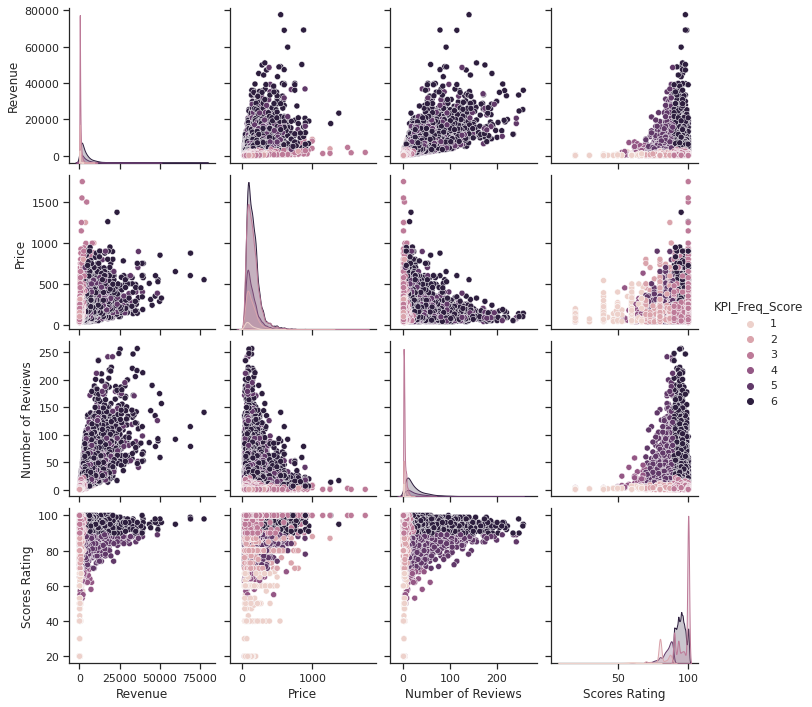

In [133]:
# Generated Graphics
sns.set_theme(style="ticks")
sns.pairplot(airbnb_reg, hue = "KPI_Freq_Score")

## **5.3 Multivariate Data Analysis** 

In [134]:
# Predict Price in Linear Regression Model
x = airbnb_reg[['Price' ,
                'Number of Reviews',
                'KPI_Freq_Score', 
                'Scores Rating']
               ]

y = airbnb_reg[['Revenue']]

In [135]:
X_const = sm.add_constant(x)

reg = sm.OLS(y, X_const).fit()

print( reg.summary() )

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.623e+04
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:26:41   Log-Likelihood:            -1.9505e+05
No. Observations:               21540   AIC:                         3.901e+05
Df Residuals:                   21535   BIC:                         3.901e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1609.9803    149.36

# **6. References**

[Slides about this work](https://docs.google.com/presentation/d/1k9UOXcOUJZ1GHARPI6CBtT1GkleMP5gisEVdUOC2bZs/edit?usp=sharing)